# Análisis Exploratorio de Datos (1) de una base de datos con jugadores de la NBA desde 1950

Importar librerías

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Lectura del archivo

In [2]:
bd = pd.read_csv("player_data.csv",delimiter=',',low_memory=False)

## Pre-proceso inicial

Filtro variables de interés 

In [5]:
bd=bd[['name','position','height','weight','birth_date','college']]

,name,position,height,weight,birth_date,college
0,Alaa Abdelnaby,F-C,6-10,240.0,"June 24, 1968",Duke University
1,Zaid Abdul-Aziz,C-F,6-9,235.0,"April 7, 1946",Iowa State University
2,Kareem Abdul-Jabbar,C,7-2,225.0,"April 16, 1947","University of California, Los Angeles"
3,Mahmoud Abdul-Rauf,G,6-1,162.0,"March 9, 1969",Louisiana State University
4,Tariq Abdul-Wahad,F,6-6,223.0,"November 3, 1974",San Jose State University
...,...,...,...,...,...,...
4545,Ante Zizic,F-C,6-11,250.0,"January 4, 1997",NaN
4546,Jim Zoet,C,7-1,240.0,"December 20, 1953",Kent State University
4547,Bill Zopf,G,6-1,170.0,"June 7, 1948",Duquesne University
4548,Ivica Zubac,C,7-1,265.0,"March 18, 1997",NaN


In [20]:
bd2=bd[(bd['college'].isin(['University of North Carolina','Davidson College','University of Texas at Austin','Wake Forest University','University of Kentucky','Arizon State University','Louisiana State University','University of Memphis']))&\
       (bd['position'].isin(['C','F','G',]))]

bd2

,name,position,height,weight,birth_date,college
3,Mahmoud Abdul-Rauf,G,6-1,162.0,"March 9, 1969",Louisiana State University
70,Al-Farouq Aminu,F,6-9,220.0,"September 21, 1990",Wake Forest University
77,Antonio Anderson,G,6-6,215.0,"June 5, 1985",University of Memphis
81,Derek Anderson,G,6-5,194.0,"July 18, 1974",University of Kentucky
131,Jay Arnette,G,6-2,175.0,"December 19, 1938",University of Texas at Austin
...,...,...,...,...,...,...
4490,James Worthy,F,6-9,225.0,"February 27, 1961",University of North Carolina
4510,Dennis Wuycik,F,6-6,215.0,"March 29, 1950",University of North Carolina
4516,Wayne Yates,C,6-8,235.0,"November 7, 1937",University of Memphis
4518,Rich Yonakor,F,6-9,220.0,"October 3, 1958",University of North Carolina


# Exploración de Variables
Los datos (variables) son características observables de los individuos de una población. Éstas variables pueden ser:

* __CUALITATIVAS__: etiquetas (numéricas o no) que representan el grupo o categoría al cual pertenece un individuo. Se puede diferenciar entre nominales y ordinales.

* __CUANTITATIVAS__: valores numéricos para los cuales tiene sentido hacer aritmética. Se puede diferenciar entre valores enteros  (discretos) y valores medidos en cierta escala (continuos).


## Exploración de Variables Cualitativas
* Número de casos disponibles
* Número de categorías
* Frecuencias relativas
* Frecuencias absolutas
* Frec. relativa acumulada
* Frec. absoluta acumulada

Calcular número máximo de registros

In [21]:
bd2.count().max()

237

Calcular cantidad de universidades

In [22]:
bd2["college"].drop_duplicates().count()

7

Cantidad de registros por columna agrupados por universidad

In [24]:
bd2.groupby(["college"]).count()

,name,position,height,weight,birth_date
college,,,,,
Davidson College,3,3,3,3,3
Louisiana State University,32,32,32,32,32
University of Kentucky,76,76,76,76,76
University of Memphis,25,25,25,25,25
University of North Carolina,53,53,53,53,53
University of Texas at Austin,23,23,23,23,23
Wake Forest University,25,25,25,25,25


Cantidad y porcentaje de jugadores por universidad

In [25]:
pdf1=bd2.groupby('college').size().reset_index(name='n').sort_values(by='n', ascending=False).reset_index(drop=True)
pdf1['p']=pdf1['n']*100/(bd2.count().max())
pdf1

,college,n,p
0,University of Kentucky,76,32.067511
1,University of North Carolina,53,22.362869
2,Louisiana State University,32,13.502110
3,University of Memphis,25,10.548523
4,Wake Forest University,25,10.548523
5,University of Texas at Austin,23,9.704641
6,Davidson College,3,1.265823


## Representación gráfica de Variables Cualitativas


Total de jugadores por universidad

In [26]:
pdf1=bd2.groupby('college').size().reset_index(name='n').sort_values(by='n', ascending=False).reset_index(drop=True)
pdf1

,college,n
0,University of Kentucky,76
1,University of North Carolina,53
2,Louisiana State University,32
3,University of Memphis,25
4,Wake Forest University,25
5,University of Texas at Austin,23
6,Davidson College,3


Gráfica de barras vertical

<AxesSubplot:xlabel='college'>

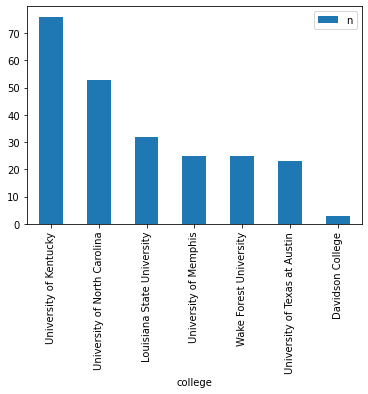

In [27]:
pdf1.plot(kind='bar',x='college',y='n')

Gráfica de barras horizontal

<AxesSubplot:ylabel='college'>

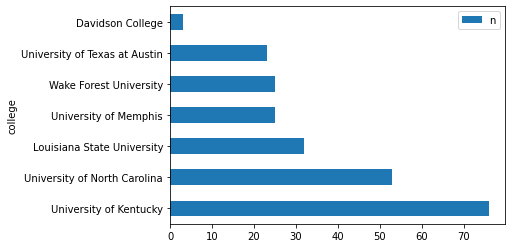

In [29]:
pdf1.plot(kind='barh',x='college',y='n')

Gráfica de torta

<AxesSubplot:ylabel='n'>

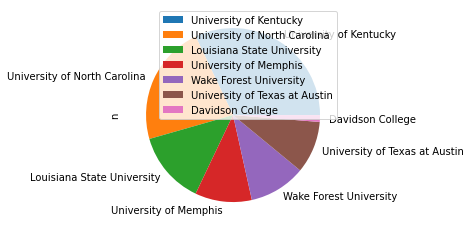

In [30]:
pdf1.plot.pie(y='n',labels=pdf1['college'])

## Exploración de Variables Cuantitativas

* Número de casos disponibles
* Medidas de localización
  * Media: centro de masas
  * Mediana: punto medio (50% de la muestra)
* Medidas de dispersión  
  * Varianza / desviación estándar
  * Cuartiles Q3 y Q1 (25% y 75% de la muestra)
  * Rango Intercuartílico: IQR = Q3 – Q1
  * Rango = max – min
* Valores extremos
  * Máximo y Mínimo;  Top y Bottom
  * Percentiles (1%, 99%)
  * Porcentaje de casos 'por encima/debajo de'.

In [31]:
bd2['weight'].describe()

count    237.000000
mean     208.194093
std       29.315863
min      136.000000
25%      185.000000
50%      205.000000
75%      225.000000
max      325.000000
Name: weight, dtype: float64

Agrupar los registros por peso en orden descendente

In [33]:
bd2.groupby(['weight']).max().sort_values(['weight'],ascending=False)

,name,position,height,birth_date,college
weight,,,,,
325.0,Shaquille O'Neal,C,7-1,"March 6, 1972",Louisiana State University
308.0,Dexter Pittman,C,6-11,"March 2, 1988",University of Texas at Austin
285.0,Stanley Roberts,C,7-0,"February 7, 1970",Louisiana State University
280.0,Geoff Crompton,C,6-11,"July 4, 1955",University of North Carolina
275.0,Josh Harrellson,C,6-10,"February 12, 1989",University of Kentucky
...,...,...,...,...,...
162.0,Mahmoud Abdul-Rauf,G,6-1,"March 9, 1969",Louisiana State University
160.0,Larry Brown,G,6-2,"September 7, 1949",Wake Forest University
156.0,Chris Garner,G,5-10,"February 2, 1975",University of Memphis


Calcular el percentil 95 del peso

In [ ]:
bd2['ArrDelay'].quantile(0.95)

## Representación gráfica de Variables Cuantitativas


Sólo se representan los datos de una muestra

In [ ]:
pdf2 = bd2[['ArrDelay']]
pdf2

In [ ]:
pdf2.plot.hist(bins=20)

In [ ]:
pdf2.plot.box()